In [21]:
df = pd.read_csv('final.csv',header=0,index_col=0).copy()
# see a little story
# basically throw out some comments about what is happening
# potentially use the dataset before the dummy variables for the data visualization


In [15]:
df.head()

,call,call_connect,email,marketing_email,site_visit,is_won,region_Africa,region_Australia,region_Australia/New Zealand,region_Belgium,...,region_US (West Coast & Southwest),region_United Kingdom,region_Western Europe (France and Germany),tier_1,tier_2,tier_3,tier_4,tier_5,has_inbound,has_outbound
001C000000nUgF7IAK006C0000013XgDcIAK,1.0,0.0,0.0,3.0,0.0,False,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
001C000000nUgF7IAK006C0000014LxSPIA0,6.0,0.0,11.0,3.0,0.0,True,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
001C000000nUgF8IAK006C00000175waIIAQ,3.0,1.0,0.0,9.0,0.0,False,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
001C000000nUgFAIA0006C000000ssBTQIA2,0.0,0.0,1.0,0.0,0.0,True,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
001C000000nUgFBIA0006C0000011BPgIIAW,0.0,0.0,4.0,0.0,0.0,False,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


What buckets make the most sense for calls, emails, marketing, and site visits?

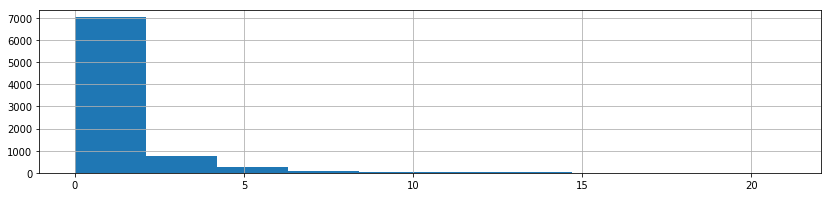

In [16]:
df['call'].hist()

In [20]:
df1 = df[df.call <= 12].copy()
pd.DataFrame(df1.groupby(pd.cut(df1.call,bins=5)).is_won.agg(['mean','size']))

,mean,size
call,,
"(-0.012, 2.4]",0.229749,7012
"(2.4, 4.8]",0.226721,741
"(4.8, 7.2]",0.214286,308
"(7.2, 9.6]",0.200000,80
"(9.6, 12.0]",0.181818,33


In [5]:
inbound = df1[df1['has_inbound'] == 1].copy()
pd.DataFrame(inbound.groupby(pd.cut(inbound.call,bins=5)).is_won.agg(['mean','size']))

,mean,size
call,,
"(-0.012, 2.4]",0.285922,3445
"(2.4, 4.8]",0.291971,274
"(4.8, 7.2]",0.323944,71
"(7.2, 9.6]",0.117647,17
"(9.6, 12.0]",0.200000,5


In [6]:
pd.qcut(df.call,10,duplicates='drop').value_counts()

(-0.001, 1.0]    6258
(1.0, 2.0]        754
(3.0, 21.0]       706
(2.0, 3.0]        477
Name: call, dtype: int64

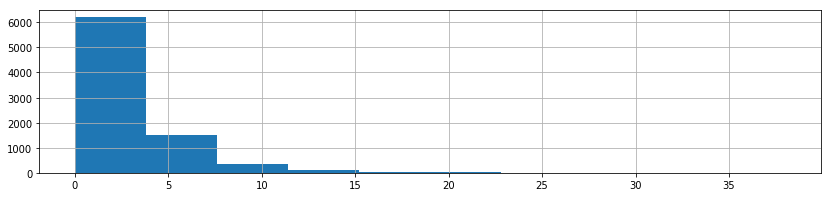

In [7]:
df['email'].hist()

In [8]:
df2 = df[df.email <= 16].copy()
pd.DataFrame(df2.groupby(pd.cut(df2.email,bins=8)).is_won.agg(['mean','size']))

,mean,size
email,,
"(-0.016, 2.0]",0.188060,5360
"(2.0, 4.0]",0.270214,1447
"(4.0, 6.0]",0.273361,717
"(6.0, 8.0]",0.362460,309
"(8.0, 10.0]",0.391304,161
"(10.0, 12.0]",0.409639,83
"(12.0, 14.0]",0.595238,42
"(14.0, 16.0]",0.518519,27


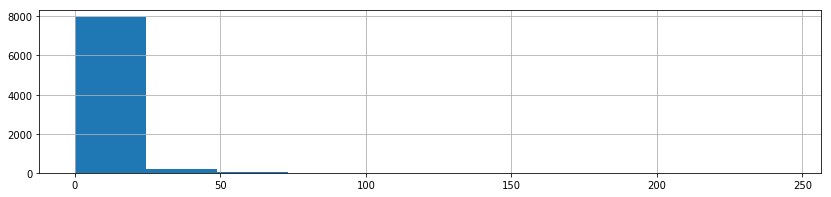

In [9]:
df['marketing_email'].hist()

In [10]:
df3 = df[df.marketing_email <= 50].copy()
pd.DataFrame(df3.groupby(pd.cut(df3.marketing_email,bins=8)).is_won.agg(['mean','size']))

,mean,size
marketing_email,,
"(-0.05, 6.25]",0.236314,6284
"(6.25, 12.5]",0.207585,1002
"(12.5, 18.75]",0.219626,428
"(18.75, 25.0]",0.163347,251
"(25.0, 31.25]",0.237500,80
"(31.25, 37.5]",0.235294,51
"(37.5, 43.75]",0.083333,24
"(43.75, 50.0]",0.178571,28


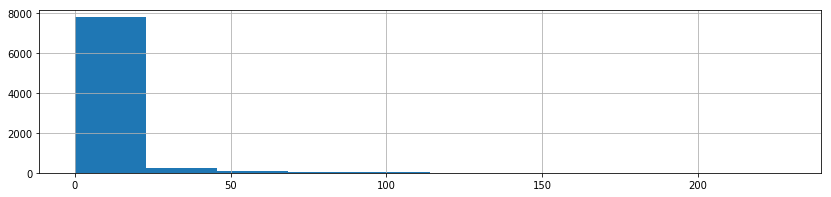

In [11]:
df['site_visit'].hist()

In [12]:
pd.DataFrame(df.groupby(pd.cut(df.site_visit,bins=10)).is_won.count())

,is_won
site_visit,
"(-0.228, 22.8]",7792
"(22.8, 45.6]",264
"(45.6, 68.4]",70
"(68.4, 91.2]",35
"(91.2, 114.0]",17
"(114.0, 136.8]",1
"(136.8, 159.6]",7
"(159.6, 182.4]",5
"(182.4, 205.2]",1


In [ ]:
df.groupby(df.)